# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [10]:
#Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding='latin1')

with open("schema.csv") as f:
    meta_data = f.read()
    
#print(meta_data)
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


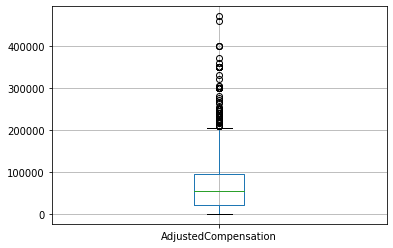

["Master's degree" "Bachelor's degree" 'Doctoral degree'
 "Some college/university study without earning a bachelor's degree"
 'I did not complete any formal education past high school'
 'Professional degree' 'I prefer not to answer']


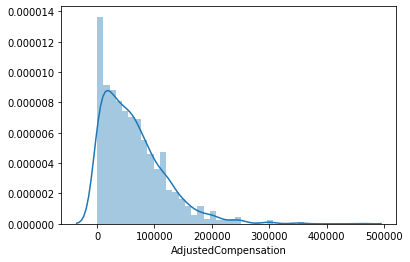

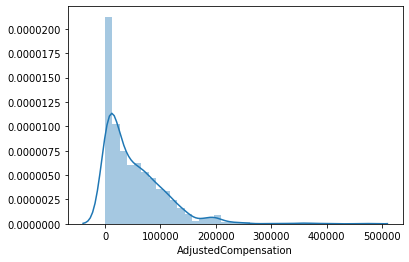

       AdjustedCompensation
count           4325.000000
mean           65944.712716
std            58473.004405
min                0.000000
25%            20329.042000
50%            53812.170000
75%            95666.080000
max           470000.000000
       AdjustedCompensation
count           1984.000000
mean           63756.862976
std            54481.635818
min                0.000000
25%            21868.000000
50%            53445.860000
75%            90704.260000
max           459000.000000
       AdjustedCompensation
count            1103.00000
mean            53744.35039
std             55285.48094
min                 0.00000
25%             11168.30000
50%             38292.15000
75%             80000.00000
max            470000.00000
P-value (MS vs BS): 3.3473804866845924e-07


In [87]:
import flatiron_stats as fs
import scipy

# null hypothesis = education level does not impact salary.  Salary mean does not change.
# alt hypothesis = higher education level increass salary.


df.info()
df.describe()
#df.shape

df_education = df[['FormalEducation', 'AdjustedCompensation']]
df_education.describe()
#print(df_education['AdjustedCompensation'].median()) # that's a lot of coin!!!  Fake news

df['FormalEducation'].unique()
df['FormalEducation'].isna().sum()
df_clean = df_education.dropna()  # if they have a nan in either, just drop them

#df_clean.info()
#scipy.stats.ttest_ind(a, b, equal_var=False)
# Some crazy is making a billion here???  Let's drop it
#print(df_clean.count())
#print(df_clean[df_clean['AdjustedCompensation'] < 500000].count())
df_clean = df_clean[(df_clean['AdjustedCompensation'] < 500000) & (df_clean['AdjustedCompensation'] >= 0)]

df_clean.boxplot()
plt.show()

sigma = df_clean['AdjustedCompensation'].std()
mu = df_clean['AdjustedCompensation'].mean()

print(df_clean['FormalEducation'].unique())
ms = df_clean[df_clean['FormalEducation'] == "Master's degree"]
bs = df_clean[df_clean["FormalEducation"] == "Bachelor's degree"]
#print(len(ms), len(bs))

alpha = 0.05
power = 0.8

sns.distplot(ms['AdjustedCompensation'])
plt.show()
sns.distplot(bs['AdjustedCompensation'])
plt.show()

print(df_clean.describe())
print(ms.describe())
print(bs.describe())
pval = fs.p_value_welch_ttest(ms['AdjustedCompensation'], bs['AdjustedCompensation'])
print("P-value (MS vs BS):", pval / 2)


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [90]:
phd = df_clean[df_clean["FormalEducation"] == 'Doctoral degree']
phd.describe()

print("Welch p-value: {}".format(p_value_welch_ttest(phd['AdjustedCompensation'], bs['AdjustedCompensation'])))

Welch p-value: 0.0


Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [92]:
# Now do the ANOVA method!!!
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df_clean).fit()
table = sm.stats.anova_lm(lm, typ=2)  # THAT's A TINY PVALUE!!!
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.891192e+11     6.0  29.867445  2.822335e-35
Residual            1.419504e+13  4318.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!